# Required Packages, Modules and Utilities

In [1]:
# Modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

# Evaluation Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import roc_auc_score, RocCurveDisplay

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Data Extraction

In [2]:
# Import csv file to DataFrame format
cc_ids_data = pd.read_csv("cc_ids_dataset.csv")

In [3]:
# Show first five rows
cc_ids_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,2/14/2018 8:31,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,2/14/2018 8:33,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,2/14/2018 8:36,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,2/14/2018 8:40,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,Benign
4,22,6,2/14/2018 8:40,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,Benign


In [4]:
# Removal of leading and trailing whitespaces from column headings
# Replace space between words in column headings with underscore(s)
cc_ids_data.columns = [column.strip().replace(' ', '_') for column in list(cc_ids_data.columns)]

# Drop unwanted columns
cc_ids_data = cc_ids_data.drop(labels=['Timestamp'], axis=1)
print(cc_ids_data.columns)

print('\n', cc_ids_data.shape)

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       'Fwd_Seg_Siz

In [5]:
# Drop rows with NaN and Infinity values

# Replace Infinity with NaN
cc_ids_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropp all the rows with NaN values
cc_ids_data.dropna(inplace=True)

cc_ids_data

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,Benign
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196979,22,6,7,1,1,0,0,0,0,0.000000,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,SSH-Bruteforce
196980,22,6,7,1,1,0,0,0,0,0.000000,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,SSH-Bruteforce
196981,22,6,353954,23,20,1912,2665,640,0,83.130435,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,SSH-Bruteforce
196982,22,6,353889,22,20,1944,2665,640,0,88.363636,...,32,0.0,0.0,0,0,0.0,0.000000,0.0,0.0,SSH-Bruteforce


# Exploratory Data Analysis

In [6]:
# Get number of rows and columns
cc_ids_data.shape

(196601, 79)

## Datatype and Range of Values of Columns

In [7]:
# Show the names and datatypes of columns
cc_ids_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196601 entries, 0 to 196983
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst_Port           196601 non-null  int64  
 1   Protocol           196601 non-null  int64  
 2   Flow_Duration      196601 non-null  int64  
 3   Tot_Fwd_Pkts       196601 non-null  int64  
 4   Tot_Bwd_Pkts       196601 non-null  int64  
 5   TotLen_Fwd_Pkts    196601 non-null  int64  
 6   TotLen_Bwd_Pkts    196601 non-null  int64  
 7   Fwd_Pkt_Len_Max    196601 non-null  int64  
 8   Fwd_Pkt_Len_Min    196601 non-null  int64  
 9   Fwd_Pkt_Len_Mean   196601 non-null  float64
 10  Fwd_Pkt_Len_Std    196601 non-null  float64
 11  Bwd_Pkt_Len_Max    196601 non-null  int64  
 12  Bwd_Pkt_Len_Min    196601 non-null  int64  
 13  Bwd_Pkt_Len_Mean   196601 non-null  float64
 14  Bwd_Pkt_Len_Std    196601 non-null  float64
 15  Flow_Byts/s        196601 non-null  float64
 16  Fl

In [8]:
# Shows the mean, standard deviation, percentiles, minimum and maximum values of numerical data (datatype - float & int)
cc_ids_data.describe()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,196601.000000,196601.000000,1.966010e+05,196601.000000,196601.000000,1.966010e+05,1.966010e+05,196601.000000,196601.000000,196601.000000,...,196601.000000,196601.000000,1.966010e+05,1.966010e+05,1.966010e+05,1.966010e+05,1.966010e+05,1.966010e+05,1.966010e+05,1.966010e+05
mean,2789.942243,6.786441,8.133333e+06,4.962574,4.367429,5.674652e+02,1.073784e+03,185.936913,3.484789,48.460354,...,2.403635,27.674712,2.167991e+05,7.951253e+04,2.828313e+05,1.619521e+05,3.430443e+06,5.370519e+05,4.157589e+06,2.978569e+06
std,9442.712013,2.918653,2.593409e+07,14.242855,33.212595,3.628405e+04,4.437583e+04,320.386921,14.725845,70.194450,...,6.444124,9.614730,1.624699e+06,8.640964e+05,2.125947e+06,1.328940e+06,1.443242e+07,3.251118e+06,1.607036e+07,1.404071e+07
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,6.000000,8.400000e+01,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.000000,1.183100e+04,2.000000,1.000000,3.300000e+01,0.000000e+00,32.000000,0.000000,24.333333,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,6.000000,3.864240e+05,4.000000,4.000000,3.550000e+02,9.350000e+02,326.000000,0.000000,94.666667,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65524.000000,17.000000,1.199992e+08,4909.000000,8788.000000,8.591554e+06,1.282239e+07,64440.000000,1460.000000,11217.025230,...,1031.000000,48.000000,1.120000e+08,6.500000e+07,1.120000e+08,1.120000e+08,1.194643e+08,4.560000e+07,1.194643e+08,1.194643e+08


In [9]:
# Label ranges
cc_ids_data['Label'].value_counts()

Infilteration               22751
Bot                         22214
Benign                      21070
FTP-BruteForce              20338
SSH-Bruteforce              20020
DoS attacks-SlowHTTPTest    20004
DoS attacks-GoldenEye       19994
DoS attacks-Hulk            19985
DDOS attack-HOIC            19235
DoS attacks-Slowloris       10990
Name: Label, dtype: int64

In [10]:
# Show the number of unique values for each column
for col in cc_ids_data.columns:
        print(col, cc_ids_data[col].nunique())

Dst_Port 4903
Protocol 3
Flow_Duration 90220
Tot_Fwd_Pkts 132
Tot_Bwd_Pkts 195
TotLen_Fwd_Pkts 2565
TotLen_Bwd_Pkts 3284
Fwd_Pkt_Len_Max 1022
Fwd_Pkt_Len_Min 85
Fwd_Pkt_Len_Mean 4774
Fwd_Pkt_Len_Std 6269
Bwd_Pkt_Len_Max 515
Bwd_Pkt_Len_Min 239
Bwd_Pkt_Len_Mean 4008
Bwd_Pkt_Len_Std 4095
Flow_Byts/s 93132
Flow_Pkts/s 95122
Flow_IAT_Mean 94382
Flow_IAT_Std 94921
Flow_IAT_Max 76557
Flow_IAT_Min 20485
Fwd_IAT_Tot 77030
Fwd_IAT_Mean 83888
Fwd_IAT_Std 68796
Fwd_IAT_Max 72526
Fwd_IAT_Min 24775
Bwd_IAT_Tot 67365
Bwd_IAT_Mean 71192
Bwd_IAT_Std 82402
Bwd_IAT_Max 61384
Bwd_IAT_Min 15747
Fwd_PSH_Flags 2
Bwd_PSH_Flags 1
Fwd_URG_Flags 2
Bwd_URG_Flags 1
Fwd_Header_Len 299
Bwd_Header_Len 448
Fwd_Pkts/s 93978
Bwd_Pkts/s 78328
Pkt_Len_Min 72
Pkt_Len_Max 787
Pkt_Len_Mean 7178
Pkt_Len_Std 8168
Pkt_Len_Var 8166
FIN_Flag_Cnt 2
SYN_Flag_Cnt 2
RST_Flag_Cnt 2
PSH_Flag_Cnt 2
ACK_Flag_Cnt 2
URG_Flag_Cnt 2
CWE_Flag_Count 2
ECE_Flag_Cnt 2
Down/Up_Ratio 12
Pkt_Size_Avg 6901
Fwd_Seg_Size_Avg 4774
Bwd_Seg_Size_Avg 400

In [11]:
# Show destination ports with the maximum number of attack types

label_destination = cc_ids_data.groupby(['Label', 'Dst_Port']).agg({'Dst_Port': 'count'})
label_destination.columns = ['Number']

for label in cc_ids_data['Label'].unique():
    print(label)
    print(label_destination.loc[label, :].sort_values('Number', ascending=False)[:3], '\n\n')

Benign
          Number
Dst_Port        
53          5344
80          4498
443         2940 


Bot
          Number
Dst_Port        
8080       22194
0             19
55063          1 


DDOS attack-HOIC
          Number
Dst_Port        
80         19235 


DoS attacks-GoldenEye
          Number
Dst_Port        
80         19994 


DoS attacks-Hulk
          Number
Dst_Port        
80         19985 


DoS attacks-SlowHTTPTest
          Number
Dst_Port        
21         20004 


DoS attacks-Slowloris
          Number
Dst_Port        
80         10990 


FTP-BruteForce
          Number
Dst_Port        
21         20338 


Infilteration
          Number
Dst_Port        
53          8801
443         6103
3389        1729 


SSH-Bruteforce
          Number
Dst_Port        
22         20020 




## Visualizations

Protocol  Protocol_Name         
0         IPv6 Hop-by-Hop Option       937
17        UDP                        14567
6         TCP                       181097
dtype: int64


<Axes: xlabel='Protocol_Name', ylabel='count'>

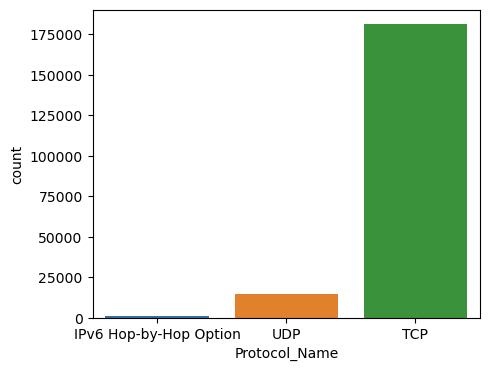

In [12]:
# Mapping of protocol numbers to corresponding names
protocol_name = cc_ids_data['Protocol'].map(lambda a: 'IPv6 Hop-by-Hop Option' if a == 0 else 'TCP' if a == 6 else 'UDP')
cc_ids_data['Protocol_Name'] = protocol_name

# Show protocol counts
print(cc_ids_data[['Protocol', 'Protocol_Name']].value_counts().sort_values())

plt.figure(figsize=(5,4))
sns.countplot(data=cc_ids_data, x='Protocol_Name', order=['IPv6 Hop-by-Hop Option', 'UDP', 'TCP'])

Protocol_Name           Label                   
IPv6 Hop-by-Hop Option  Benign                        531
                        Infilteration                 387
                        Bot                            19
TCP                     Bot                         22195
                        FTP-BruteForce              20338
                        SSH-Bruteforce              20020
                        DoS attacks-SlowHTTPTest    20004
                        DoS attacks-GoldenEye       19994
                        DoS attacks-Hulk            19985
                        DDOS attack-HOIC            19235
                        Benign                      14925
                        Infilteration               13411
                        DoS attacks-Slowloris       10990
UDP                     Infilteration                8953
                        Benign                       5614
Name: Label, dtype: int64


<Axes: xlabel='Protocol_Name', ylabel='count'>

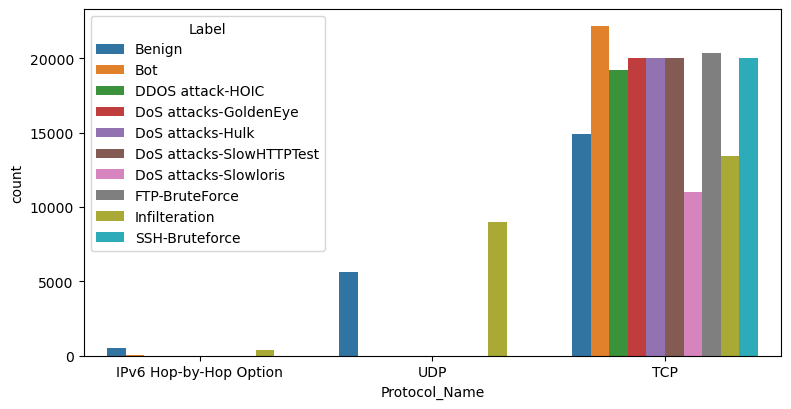

In [13]:
# Categorize labels by protocols
print(cc_ids_data.groupby('Protocol_Name')['Label'].value_counts())

plt.figure(figsize=(9,4.5))
sns.countplot(data=cc_ids_data, x='Protocol_Name', hue='Label', order=['IPv6 Hop-by-Hop Option', 'UDP', 'TCP'])

Protocol_Name
IPv6 Hop-by-Hop Option    8.604563e+07
TCP                       8.368556e+06
UDP                       1.974533e+05
Name: Flow_Duration, dtype: float64


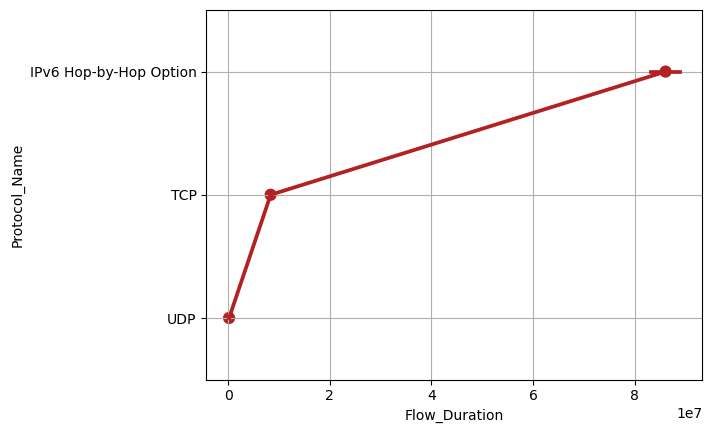

In [14]:
# Show mean flow duration for each protocol for comparison
# Error bar shows 95% confidence interval

print(cc_ids_data.groupby('Protocol_Name')['Flow_Duration'].mean())

sns.pointplot(data=cc_ids_data, y='Protocol_Name', x='Flow_Duration', 
              order=['IPv6 Hop-by-Hop Option', 'TCP', 'UDP'], color='firebrick')
plt.grid()
plt.show()

Label
DoS attacks-SlowHTTPTest         0.000000
FTP-BruteForce                   0.000000
DoS attacks-GoldenEye          393.868199
SSH-Bruteforce               10836.524466
Bot                          20553.915952
DoS attacks-Hulk             29689.901499
DDOS attack-HOIC             49698.026433
DoS attacks-Slowloris       311909.614163
Benign                      340626.978510
Infilteration               381887.970635
Name: Flow_Byts/s, dtype: float64


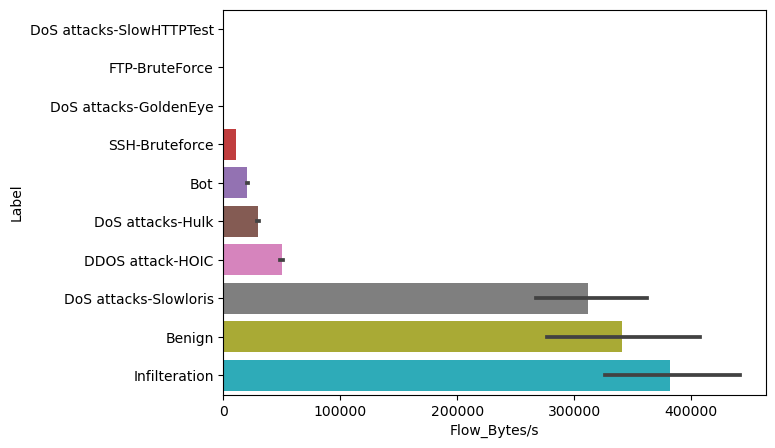

In [15]:
# Displays mean of Flow_Bytes/s per label.
# Lines show 95% confidence intervals for the mean
label_flowbyte = cc_ids_data.groupby('Label')['Flow_Byts/s'].mean().sort_values()
print(label_flowbyte)

plt.figure(figsize=(7,5))
sns.barplot(data=cc_ids_data, x='Flow_Byts/s', y='Label', order=label_flowbyte.index)
plt.xlabel('Flow_Bytes/s')

plt.show()

Label
DoS attacks-SlowHTTPTest      0.000000
FTP-BruteForce                0.000000
Bot                          32.316677
DoS attacks-Slowloris        67.612259
DDOS attack-HOIC             87.894181
Benign                       89.594574
SSH-Bruteforce               89.959459
DoS attacks-Hulk             92.388846
Infilteration               100.655783
DoS attacks-GoldenEye       136.758011
Name: Pkt_Size_Avg, dtype: float64


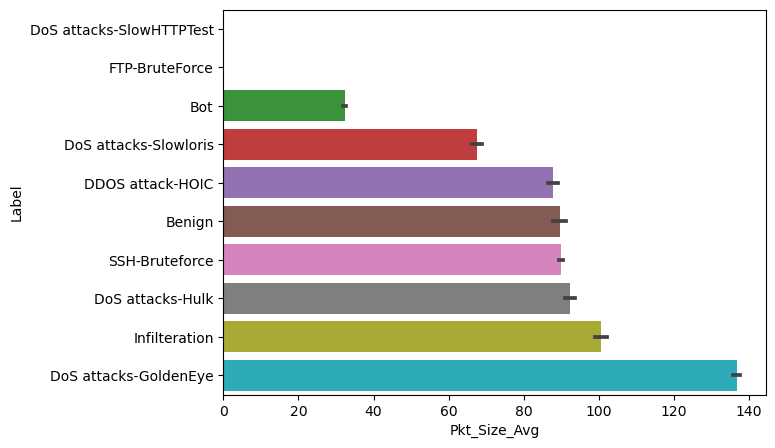

In [16]:
# Displays mean of Packet_Size_Average per label.
# Lines show 95% confidence intervals for the mean

label_flowpkt = cc_ids_data.groupby('Label')['Pkt_Size_Avg'].mean().sort_values()
print(label_flowpkt)

plt.figure(figsize=(7,5))
sns.barplot(data=cc_ids_data, x='Pkt_Size_Avg', y='Label', order=label_flowpkt.index)

plt.show()

# Feature Engineering
### to select and transfrom relevant features

### Data Transformation for Multi-class Classification:
- Benign = 0
- Bot = 1
- DDOS attack-HOIC = 2
- DoS attacks-GoldenEye = 3
- DoS attacks-Hulk = 4
- DoS attacks-SlowHTTPTest = 5
- DoS attacks-Slowloris = 6
- FTP-BruteForce = 7
- Infilteration = 8
- SSH-Bruteforce = 9

In [17]:
# Assign number to labels
all_labels = list(cc_ids_data['Label'].unique())
index_and_labels = list(enumerate(all_labels))

index_and_labels

[(0, 'Benign'),
 (1, 'Bot'),
 (2, 'DDOS attack-HOIC'),
 (3, 'DoS attacks-GoldenEye'),
 (4, 'DoS attacks-Hulk'),
 (5, 'DoS attacks-SlowHTTPTest'),
 (6, 'DoS attacks-Slowloris'),
 (7, 'FTP-BruteForce'),
 (8, 'Infilteration'),
 (9, 'SSH-Bruteforce')]

In [18]:
# Mapping of all dataset labels to unique numbers
def map_label(label):
    for lab in index_and_labels:
        if label == lab[1]:
            label_num = lab[0]
            return label_num

cc_ids_data['Label_Multiple'] = cc_ids_data['Label'].apply(map_label)

print(cc_ids_data['Label_Multiple'].value_counts())

8    22751
1    22214
0    21070
7    20338
9    20020
5    20004
3    19994
4    19985
2    19235
6    10990
Name: Label_Multiple, dtype: int64


Infilteration               22751
Bot                         22214
Benign                      21070
FTP-BruteForce              20338
SSH-Bruteforce              20020
DoS attacks-SlowHTTPTest    20004
DoS attacks-GoldenEye       19994
DoS attacks-Hulk            19985
DDOS attack-HOIC            19235
DoS attacks-Slowloris       10990
Name: Label, dtype: int64


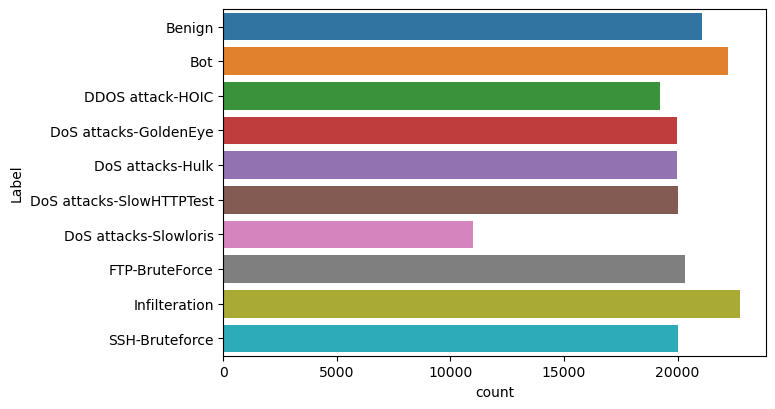

In [19]:
# Show Multi-class Classification Labels
print(cc_ids_data['Label'].value_counts())

plt.figure(figsize=(7, 4.5))
sns.countplot(data=cc_ids_data, y='Label')
plt.show()

### Predictor Variables and Target Variable

In [20]:
# Drop target and categorical columns to get only features
numeric_features = list(cc_ids_data.columns.drop(['Protocol_Name', 'Label', 'Label_Multiple']))

# Combine relevant features to get training data
training_set = cc_ids_data[numeric_features]         # predictor variables
print(training_set.columns)

# Target variable
multi_y = cc_ids_data['Label_Multiple'].values

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       'Fwd_Seg_Siz

# Model Fitting, Prediction & Evaluation 

In [21]:
# Set seed for reproducibility
SEED = 21

# the models
models = [DecisionTreeClassifier(random_state=SEED),
          RandomForestClassifier(random_state=SEED),
          KNeighborsClassifier(),
          LogisticRegression(random_state=SEED, max_iter=300),
          LinearSVC(random_state=SEED)]

## Multi-class Classification

In [22]:
# Split data into 70% training set and 30% test set
# X: features; y: targets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(training_set, multi_y, test_size=0.3, 
                                                                            random_state=SEED)


The Metrics for DecisionTreeClassifier are: 

Accuracy: 0.901

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6296
           1       1.00      1.00      1.00      6725
           2       1.00      1.00      1.00      5780
           3       1.00      1.00      1.00      6018
           4       1.00      1.00      1.00      6080
           5       0.80      0.51      0.62      5869
           6       1.00      1.00      1.00      3256
           7       0.65      0.88      0.75      6145
           8       0.84      0.84      0.84      6808
           9       1.00      1.00      1.00      6004

    accuracy                           0.90     58981
   macro avg       0.91      0.90      0.90     58981
weighted avg       0.91      0.90      0.90     58981

[[5196    1    1    1    0    0    1    0 1096    0]
 [   1 6724    0    0    0    0    0    0    0    0]
 [   0    0 5780    0    0    0    0    0    0    0]
 [   0    0    0 6

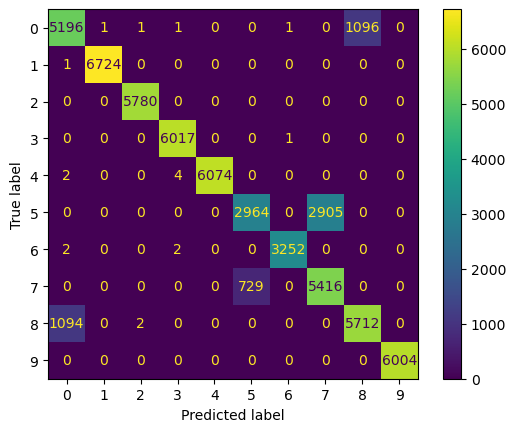


The Metrics for RandomForestClassifier are: 

Accuracy: 0.903

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      6296
           1       1.00      1.00      1.00      6725
           2       1.00      1.00      1.00      5780
           3       1.00      1.00      1.00      6018
           4       1.00      1.00      1.00      6080
           5       0.80      0.50      0.62      5869
           6       1.00      1.00      1.00      3256
           7       0.65      0.88      0.75      6145
           8       0.85      0.85      0.85      6808
           9       1.00      1.00      1.00      6004

    accuracy                           0.90     58981
   macro avg       0.91      0.91      0.90     58981
weighted avg       0.91      0.90      0.90     58981

[[5231    0    2    1    0    0    1    0 1061    0]
 [   2 6723    0    0    0    0    0    0    0    0]
 [   0    0 5779    0    0    0    0    0    1    0]
 [   0    0    0 6

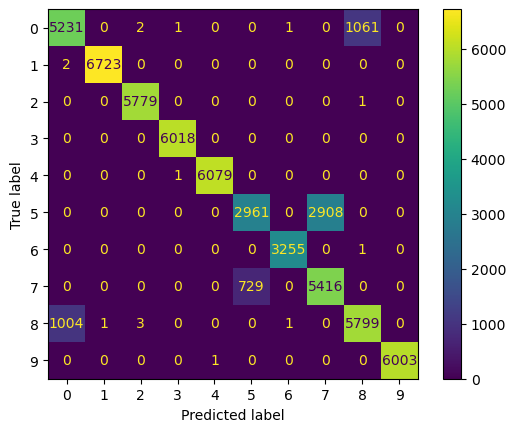


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.875

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6296
           1       1.00      1.00      1.00      6725
           2       1.00      1.00      1.00      5780
           3       0.99      1.00      1.00      6018
           4       0.98      0.99      0.98      6080
           5       0.61      0.96      0.75      5869
           6       0.99      0.99      0.99      3256
           7       0.91      0.43      0.58      6145
           8       0.74      0.76      0.75      6808
           9       1.00      1.00      1.00      6004

    accuracy                           0.87     58981
   macro avg       0.90      0.88      0.88     58981
weighted avg       0.89      0.87      0.87     58981

[[4406    1    0   12   92    7    6    2 1755   15]
 [   0 6721    0    0    2    0    0    0    2    0]
 [   0    0 5780    0    0    0    0    0    0    0]
 [   1    0    0 601

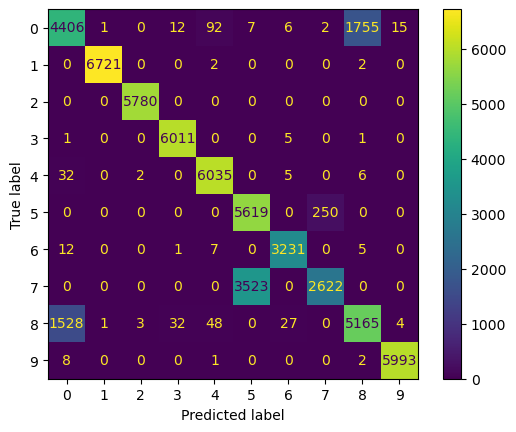


The Metrics for LogisticRegression are: 

Accuracy: 0.5

              precision    recall  f1-score   support

           0       0.27      0.48      0.35      6296
           1       0.00      0.00      0.00      6725
           2       0.70      0.99      0.82      5780
           3       0.93      0.83      0.88      6018
           4       0.71      0.12      0.20      6080
           5       0.57      0.02      0.04      5869
           6       0.50      0.68      0.58      3256
           7       0.45      0.99      0.62      6145
           8       0.19      0.23      0.21      6808
           9       0.73      0.85      0.78      6004

    accuracy                           0.50     58981
   macro avg       0.51      0.52      0.45     58981
weighted avg       0.49      0.50      0.43     58981

[[3051    6   40  235  125   16  835  345  981  662]
 [3373    0    0    2    0    0    0    0 3350    0]
 [  77    0 5703    0    0    0    0    0    0    0]
 [ 747    0   78 4969   

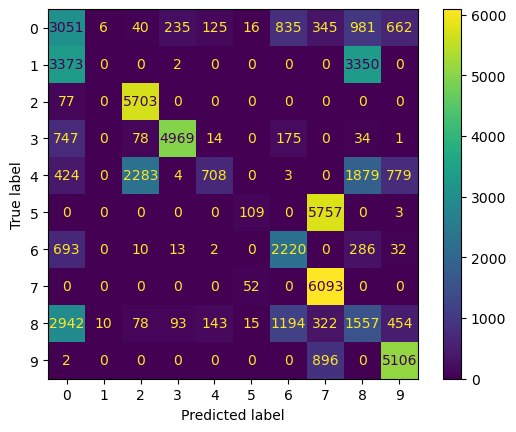


The Metrics for LinearSVC are: 

Accuracy: 0.656

              precision    recall  f1-score   support

           0       0.38      0.77      0.51      6296
           1       0.83      1.00      0.90      6725
           2       0.97      0.99      0.98      5780
           3       0.92      0.32      0.48      6018
           4       0.98      0.99      0.98      6080
           5       0.00      0.00      0.00      5869
           6       0.00      0.00      0.00      3256
           7       0.51      1.00      0.68      6145
           8       0.22      0.20      0.21      6808
           9       1.00      1.00      1.00      6004

    accuracy                           0.66     58981
   macro avg       0.58      0.63      0.57     58981
weighted avg       0.61      0.66      0.60     58981

[[4826  363   40   39   43    3    9   38  926    9]
 [  22 6698    0    1    0    0    0    0    4    0]
 [   2   40 5738    0    0    0    0    0    0    0]
 [1059  590    6 1932   83    0

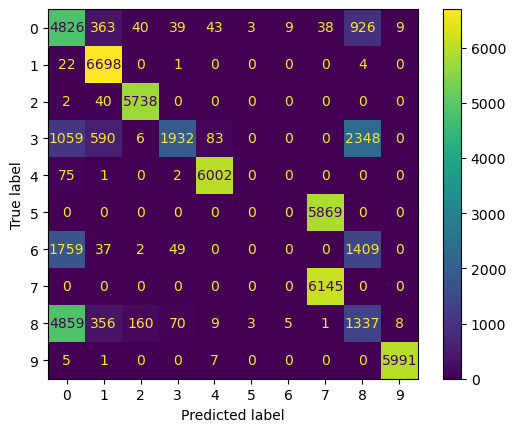

In [23]:
# Lists for evaluation metrics
multi_model = []
multi_accuracy = []

for model in models:
    model_name = model.__class__.__name__
    model.fit(multi_X_train, multi_y_train)
    model_pred = model.predict(multi_X_test)

    cm = metrics.confusion_matrix(multi_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    accuracy = np.round(accuracy_score(multi_y_test, model_pred), 3)

    # Append results to corresponding lists
    multi_model.append(model_name)
    multi_accuracy.append(accuracy)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}\n'.format(accuracy))

    print(classification_report(multi_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()

    print("==========================================================================================================")

## Compilation of Multi-class Classification Results

In [24]:
# Convert lists to a single DataFrame
multi_dict_of_lists = {"Multi_Model": multi_model, "Multi_Accuracy": multi_accuracy}
multi_all_results = pd.DataFrame(multi_dict_of_lists)

multi_all_results

,Multi_Model,Multi_Accuracy
0,DecisionTreeClassifier,0.901
1,RandomForestClassifier,0.903
2,KNeighborsClassifier,0.875
3,LogisticRegression,0.500
4,LinearSVC,0.656


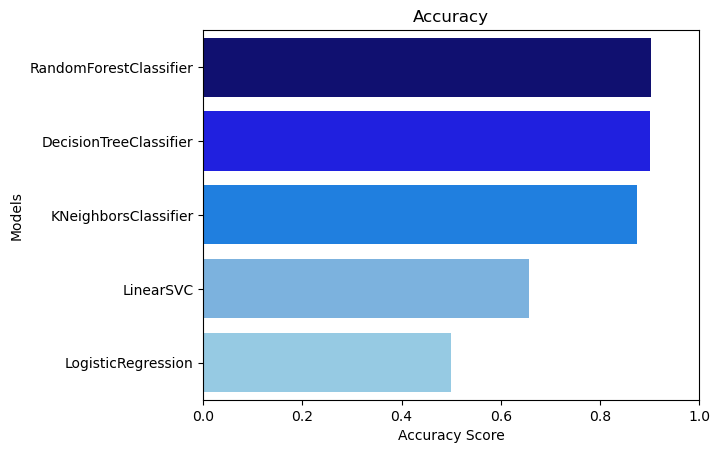

In [25]:
# Accuracy of models
custom_palette = ["navy", "blue", "#007FFF", "#6CB4EE", "#89CFF0"]
acc_desc = multi_all_results.set_index('Multi_Model').sort_values(by='Multi_Accuracy', ascending=False).index

sns.barplot(x=multi_accuracy, y=multi_model, palette=custom_palette, order=acc_desc)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()